# Used Car Price Prediction:

## A Linear Regression Model to Estimate Prices of Used Cars

### 1. Project Overview

Estimating used car prices involves analyzing features like mileage, age, fuel type, engine size, and overall condition. Prices vary significantly based on these attributes, making price predictions essential.

Building accurate models helps buyers and sellers make fair decisions, supports dealerships in pricing strategies, and promotes transparency in the used car market.

To keep this analysis simple, only toyota models are used. However, the process can be extended to accomodate other products when required.

#### 1.1  Objective

- Analyze factors influencing used car prices.
- Build a linear regression model to predict prices base on key attributes.
- Provide actionable insights for used car buyers and sellers.

#### 1.2 Deliverables

- Summary report highlighting model performance and key insights including influential factors affecting car prices.
- Trained linear regression model.
- Python script for estimating car prices base on input features.
- Clean, commented code with a guide for replicating the analysis using the model.

#### 1.3 Technologies

- Python (pandas, numPy, matplotlib, seaborn, scikit-learn)
- Jupyter Notebook
- Microsoft PowerPoint

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # clear seaborn warnings

# set charts style
plt.style.use('seaborn-whitegrid')

# Data Inspection and Cleaning:

In [ ]:
# import and inspect data

df_toyota = pd.read_csv('C:/Users/jake/Documents/data analytics/projects/linear regression/toyota.csv')
df_toyota.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
# count of entries and attributes

df_toyota.shape


(6738, 9)

In [ ]:
# unique values

print(df_toyota['model'].unique())
print(df_toyota['transmission'].unique())
print(df_toyota['fuelType'].unique())


[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']


- Entries in **model** column have **extra spaces** that should be removed.

In [ ]:
# trim extra spaces from "model"

df_toyota['model'] = df_toyota['model'].str.strip()
print(df_toyota['model'].unique())


['GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis'
 'Verso' 'Hilux' 'PROACE VERSO' 'Land Cruiser' 'Supra' 'Camry' 'Verso-S'
 'IQ' 'Urban Cruiser']


In [ ]:
# count of null values

df_toyota.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

- No **missing values**.

In [ ]:
# non-null count and datatypes

df_toyota.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


- **Data types** are **accurate**.

In [ ]:
# descriptive statistics

df_toyota.describe()


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


### Observed zero values:
- **engineSize** has zero minimum value. That is suspicious since no car in the data is electric.
- **tax** can be zero depending on some conditions in certain areas.

In [ ]:
# entries with  engineSize = 0
df_toyota[df_toyota['engineSize']==0]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2535,Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0.0
2545,Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0.0
5126,Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0.0
5233,Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0.0
5257,Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0.0
5960,C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0.0


### Treatment for zero engineSize entries:
- **6** entries (4 petrol, 2 hybrid) have **engineSize = 0**.
- **Fill** these entries with the **mean** for the same models.
- Since engineSize values are small, error to be introduced due to mean values is low.

In [ ]:
# non-zero engineSize condition
non_zero_engineSize = df_toyota['engineSize']!=0

# mean of non-zero engineSize values for "Yaris" model
mean_non_zero_engineSize_Yaris = round(df_toyota.loc[non_zero_engineSize & (df_toyota['model']=='Yaris'), 'engineSize'].mean(), 1)
mean_non_zero_engineSize_Yaris

# mean of non-zero engineSize values for "Aygo" model
mean_non_zero_engineSize_Aygo = round(df_toyota.loc[non_zero_engineSize & (df_toyota['model']=='Aygo'), 'engineSize'].mean(), 1)
mean_non_zero_engineSize_Aygo

# mean of non-zero engineSize values for "C-HR" model
mean_non_zero_engineSize_C_HR = round(df_toyota.loc[non_zero_engineSize & (df_toyota['model']=='C-HR'), 'engineSize'].mean(), 1)
mean_non_zero_engineSize_C_HR

# replace zeros for "Yaris" model
df_toyota.loc[(non_zero_engineSize==False) & (df_toyota['model']=='Yaris'), 'engineSize'] = mean_non_zero_engineSize_Yaris

# replace zeros for "Aygo" model
df_toyota.loc[(non_zero_engineSize==False) & (df_toyota['model']=='Aygo'), 'engineSize'] = mean_non_zero_engineSize_Aygo

# replace zeros for "C-HR" model
df_toyota.loc[(non_zero_engineSize==False) & (df_toyota['model']=='C-HR'), 'engineSize'] = mean_non_zero_engineSize_C_HR


In [ ]:
# confirm no zero "engineSize" values

len(df_toyota[df_toyota['engineSize']==0])


0

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'tax'}>],
       [<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'engineSize'}>]], dtype=object)

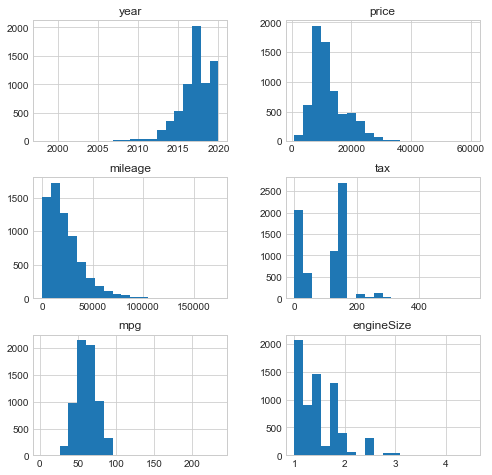

In [ ]:
# distribution plots

df_toyota.hist(figsize=(8,8), bins=20)


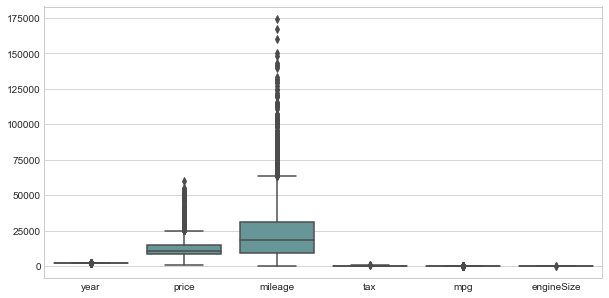

In [ ]:
# box plots

plt.figure(figsize=(10,5))
sns.boxplot(data=df_toyota, color='cadetblue')
plt.show()


- **price** and **mileage** contain **outliers**.

# Visualizing Data with Target Variable (Price):

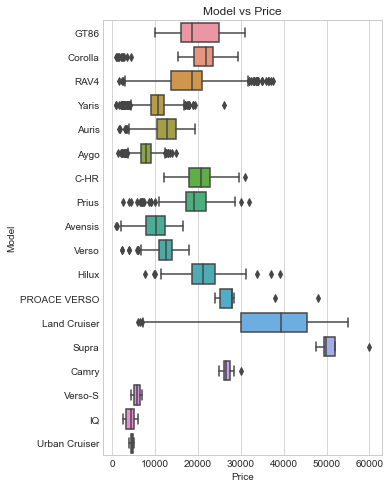

In [ ]:
# model vs price

plt.figure(figsize=(5,8))
sns.boxplot(data=df_toyota, x='price', y='model')
plt.xlabel('Price')
plt.ylabel('Model')
plt.title('Model vs Price')
plt.show()


In [ ]:
# Supra prices standard deviation
Supra_price_Standard_Deviation = df_toyota[df_toyota['model']=='Supra']['price'].std()
print(f'Supra price Standard Deviation: {Supra_price_Standard_Deviation}')

# Land Cruiser prices standard deviation
Land_Cruiser_price_Standard_Deviation = df_toyota[df_toyota['model']=='Land Cruiser']['price'].std()
print(f'Land Cruiser price Standard Deviation: {Land_Cruiser_price_Standard_Deviation}')


Supra price Standard Deviation: 3294.2780972192045
Land Cruiser price Standard Deviation: 13103.387454200612


### Stable and Fluctuating Prices:
- Supra has the highest Median Price.
- Supra, Camry and PROACE VERSO have low Standard Deviations with few outliers indicating higher **stability in prices**.
- Conversely, Land Cruiser, GT86, and RAV4 indicate high **price fluctuations**.

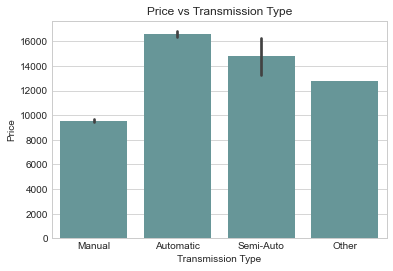

In [ ]:
# price vs. transmission type - bar plot

plt.figure(figsize=(6,4))
sns.barplot(data=df_toyota, x='transmission', y='price', estimator=np.mean, color='cadetblue')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Price vs Transmission Type')
plt.show()


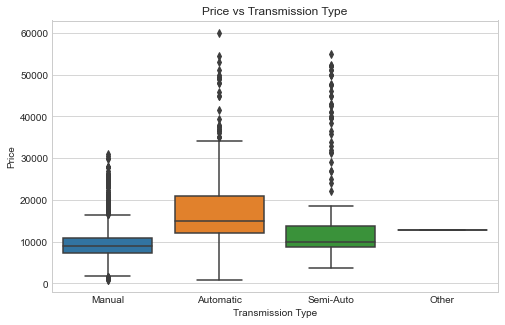

In [ ]:
# price vs. transmission type - box plot

plt.figure(figsize=(8,5))
sns.boxplot(data=df_toyota, x='transmission', y='price')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Price vs Transmission Type')
plt.show()


- Automatic transmission cars have the highest median prices.

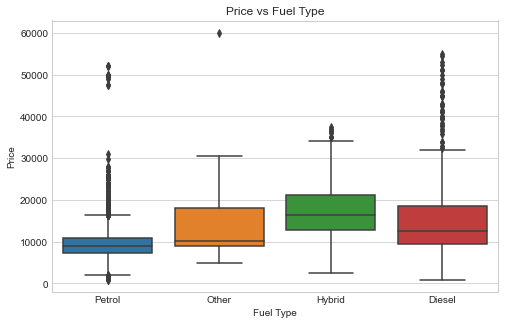

In [ ]:
# Fuel Type vs Price

plt.figure(figsize=(8,5))
sns.boxplot(data=df_toyota, x='fuelType', y='price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price vs Fuel Type')
plt.show()


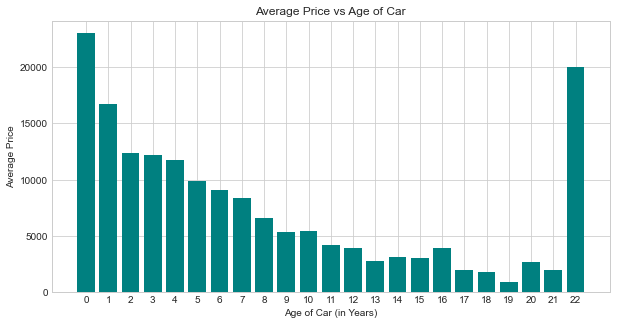

In [ ]:
# Age of car (in Years) vs. Average Price:

# calculate the maximum year
max_year = df_toyota['year'].max()

# calculate the Age of Car (in Years)
age_of_car = max_year - df_toyota['year']
df_age_of_car = pd.DataFrame({'age_of_car': age_of_car, 'price': df_toyota['price']})

# group by 'age_of_car' and calculate the mean price
df_grouped_age_of_car = df_age_of_car.groupby('age_of_car')['price'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.xticks(ticks=df_grouped_age_of_car['age_of_car'])
plt.bar(df_grouped_age_of_car['age_of_car'], df_grouped_age_of_car['price'], color='teal')
plt.xlabel('Age of Car (in Years)')
plt.ylabel('Average Price')
plt.title('Average Price vs Age of Car')
plt.show()


### Best time to sale off used cars to maximize returns:
- There's significant price drop after the first 4 years. This might be the best time to sale off.
- Though price drops greatly after year 1 and 2, the cars are still relatively new.

### Outlier:
- Let's investigate the model with a high average price even after 22 years of use.

In [ ]:
# inspect outlier entry with high resale value even after 22 years

df_toyota[df_age_of_car['age_of_car']==22]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6694,Land Cruiser,1998,19990,Manual,100000,Diesel,265,23.9,4.2


- There's only one Land Cruiser 1998 model in the data set.  This is obviously an outlier.

# Feature Engineering:

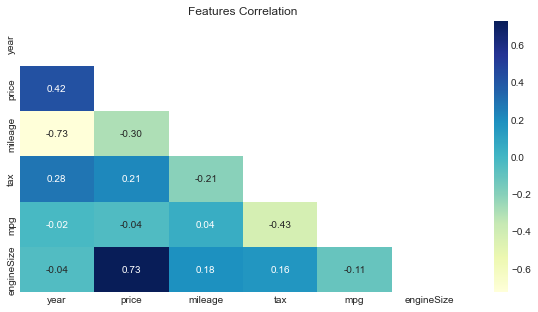

In [ ]:
# Correlation Matrix:

# create a mask for the upper triangle
mask = np.triu(np.ones_like(df_toyota.corr(), dtype=bool))

# correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_toyota.corr(), mask=mask, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Features Correlation")
plt.show()


### Possible Multicollinearity:
- **mileage** and **year** with correlation value -0.73

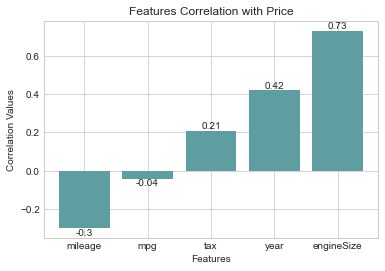

In [ ]:
# Features Correlation with target feature (price)

# calculate correlations
correlations = round(df_toyota.corr(), 2)['price'].drop('price')

# sort correlations
correlations = correlations.sort_values()

# data
features = [keys for keys in correlations.keys()]
values = [values for values in correlations.values]

# create bar plot
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(features, values, color='cadetblue')

# add data labels
ax.bar_label(bars)

# add titles and labels
ax.set_title('Features Correlation with Price')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation Values')

# show plot
plt.show()


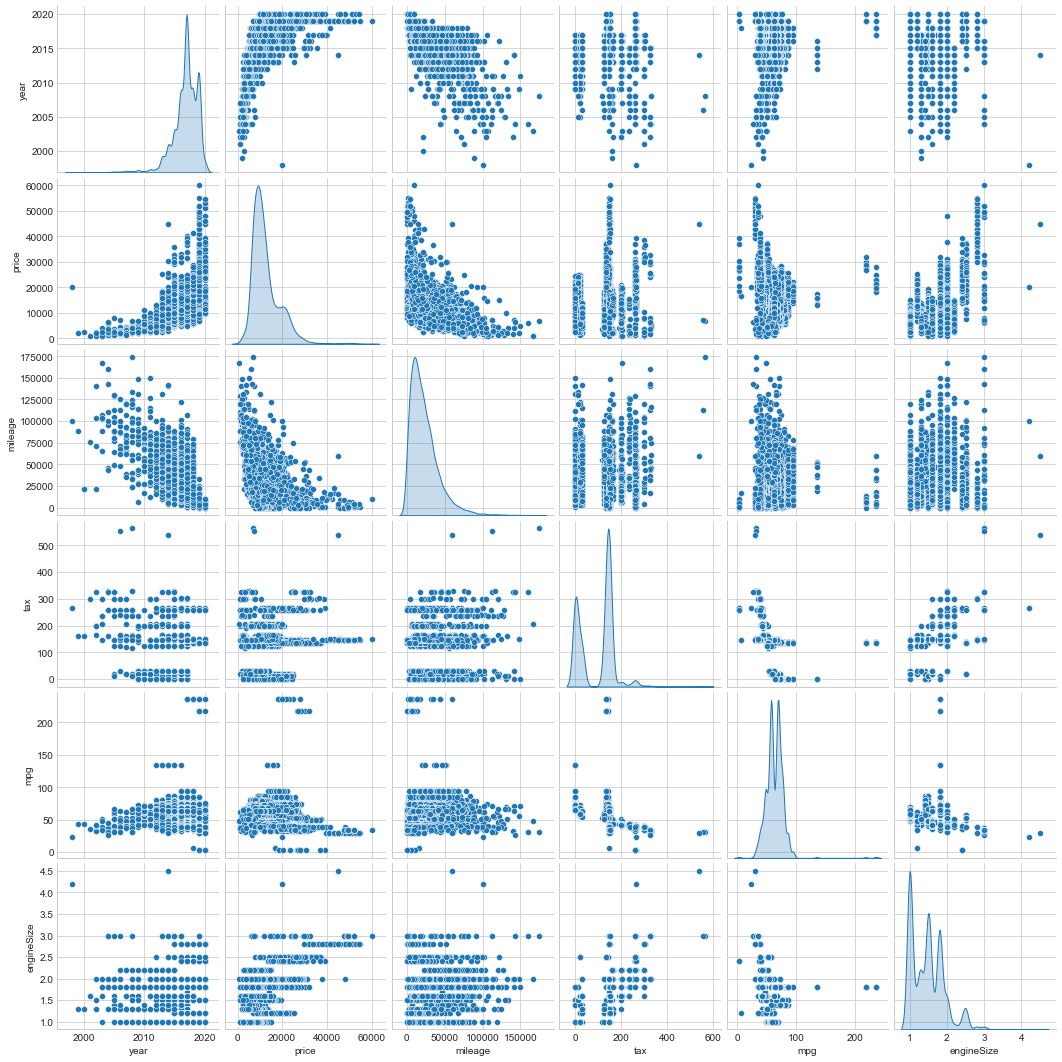

In [ ]:
# pair plot

sns.pairplot(df_toyota, palette='coolwarm', diag_kind='kde')
plt.show()


In [ ]:
# features encoding

# one-hot encode categorical attributes ("model", "transmission", "fuelType")
model_dummies = pd.get_dummies(data=df_toyota['model'], prefix='model')
transmission_dummies = pd.get_dummies(data=df_toyota['transmission'], prefix='transmission')
fuelType_dummies = pd.get_dummies(data=df_toyota['fuelType'], prefix='fuelType')

# create new DataFrame and add encoded features (drop one column for each) to main DataFrame
df_toyota_encoded = pd.concat([df_toyota,
                               model_dummies.drop('model_Verso-S', axis='columns'),
                               transmission_dummies.drop('transmission_Other', axis='columns'),
                               fuelType_dummies.drop('fuelType_Other', axis='columns')],
                              axis='columns')

# drop categorical features
df_toyota_encoded.drop(['model', 'transmission', 'fuelType'], axis='columns', inplace=True)


# Data Modeling:

In [ ]:
# split data into predictors and target

X = df_toyota_encoded.drop(['price'], axis='columns') # predictors
y = df_toyota_encoded['price'] # target


In [ ]:
# train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


In [ ]:
# fit linear regression model
from sklearn.linear_model import LinearRegression
lin_reg_model_1 = LinearRegression()
lin_reg_model_1.fit(X_train, y_train)


LinearRegression()

# Model Evaluation:

In [ ]:
# model test performance score (r2_score)

lin_reg_model_test_score_1 = lin_reg_model_1.score(X_test, y_test)
print(f'lin_reg_model_test_score_1: {lin_reg_model_test_score_1}')


lin_reg_model_test_score_1: 0.9190572535390211


In [ ]:
# cross validation scores

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_scores_1 = cross_val_score(LinearRegression(), X, y, cv=cv)

print(f'cross_val_scores_1: {cross_val_scores_1}')


cross_val_scores_1: [0.92120733 0.92704882 0.92113752 0.91626676 0.92239856 0.93902216
 0.9300561  0.92741144 0.93280176 0.91244987]


### Model Performance:
- Test and cross validation scores show **model performance** at around **(91 to 92)%**

# Features Transformation:

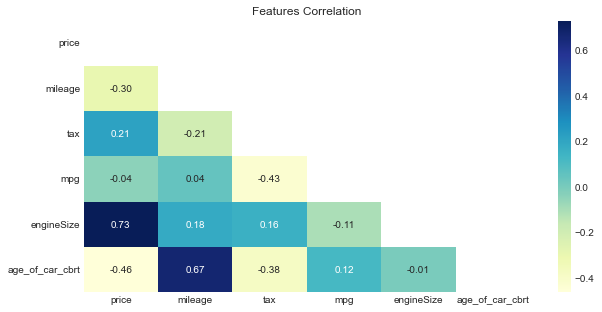

In [ ]:
# "year" feature transformation to "age_of_car" (defined earlier) with cube root
df_toyota['age_of_car_cbrt'] = np.cbrt(df_age_of_car['age_of_car'])

# drop "year"
df_toyota.drop('year', axis='columns', inplace=True)

# create a mask for the upper triangle
mask = np.triu(np.ones_like(df_toyota.corr(), dtype=bool))

# correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_toyota.corr(), mask=mask, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Features Correlation")
plt.show()


### Correlations Improvement:
- **year** correlation with price = 0.42
- **age_of_car_cbrt** (derived from **year**) correlation with price = -0.46
- this indicates an improvement of 0.04 absolute.

### Reduced Multicollinearity:
- **mileage vs year** correlation reduced from **-0.73 to 0.67** for mileage vs age_of_car_cbrt.

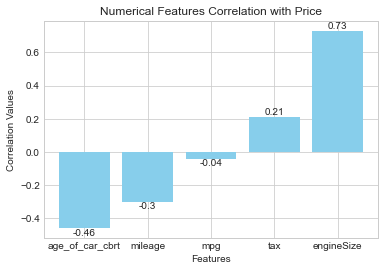

In [ ]:
# Features Correlation with target feature (price)

# calculate correlations
correlations = round(df_toyota.corr(), 2)['price'].drop('price')

# sort correlations
correlations = correlations.sort_values()

# data
features = [keys for keys in correlations.keys()]
values = [values for values in correlations.values]

# create bar plot
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(features, values, color='skyblue')

# add data labels
ax.bar_label(bars)

# add titles and labels
ax.set_title('Numerical Features Correlation with Price')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation Values')

plt.savefig('features correlation.png', dpi=1200, bbox_inches='tight')

# show plot
plt.show()


# Retraining and Evaluating Model after Feature Transformation:

In [ ]:
# one-hot encode categorical attributes ("model", "transmission", "fuelType")
model_dummies = pd.get_dummies(data=df_toyota['model'], prefix='model')
transmission_dummies = pd.get_dummies(data=df_toyota['transmission'], prefix='transmission')
fuelType_dummies = pd.get_dummies(data=df_toyota['fuelType'], prefix='fuelType')

# create new DataFrame and add encoded features (drop one column for each) to main DataFrame
df_toyota_encoded = pd.concat([df_toyota,
                               model_dummies.drop('model_Verso-S', axis='columns'),
                               transmission_dummies.drop('transmission_Other', axis='columns'),
                               fuelType_dummies.drop('fuelType_Other', axis='columns')],
                              axis='columns')

# drop categorical features
df_toyota_encoded.drop(['model', 'transmission', 'fuelType'], axis='columns', inplace=True)

# split data into predictors and target
X = df_toyota_encoded.drop(['price'], axis='columns') # predictors
y = df_toyota_encoded['price'] # target



# apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)



# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=23)

# fit linear regression model
from sklearn.linear_model import LinearRegression
lin_reg_model_2 = LinearRegression()
lin_reg_model_2.fit(X_train, y_train)

# model test performance score (r2_score)
lin_reg_model_test_score_2 = lin_reg_model_2.score(X_test, y_test)

# cross validation scores
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_scores_2 = cross_val_score(LinearRegression(), X, y, cv=cv)


In [ ]:
# test scores
print(f'lin_reg_model_test_score_1: {lin_reg_model_test_score_1}')
print(f'lin_reg_model_test_score_2: {lin_reg_model_test_score_2}')

# cross validation scores
print(f'cross_val_scores_1: {cross_val_scores_1}')
print(f'cross_val_scores_2: {cross_val_scores_2}')


lin_reg_model_test_score_1: 0.9190572535390211
lin_reg_model_test_score_2: 0.9230609029938144
cross_val_scores_1: [0.92120733 0.92704882 0.92113752 0.91626676 0.92239856 0.93902216
 0.9300561  0.92741144 0.93280176 0.91244987]
cross_val_scores_2: [0.93005381 0.92859453 0.92313992 0.92033798 0.92341788 0.94097852
 0.93300567 0.93212829 0.93604797 0.91936751]


### Model Performance Improvement:
- both **test** and **cross validation** scores indicate some **improvement** in the second model after feature transformation.

In [ ]:
# predict target for test features using second model

predicted_price = lin_reg_model_2.predict(X_test)
predicted_price


array([ 7698.18341271,  4033.07717886,  8132.4828912 , ...,
       45181.31142394, 12594.20970062,  7474.38185468])

In [ ]:
# create new DataFrame and add predicted_price to df_toyota only for matching rows with X_test

df_toyota_predicted = pd.concat([df_toyota.loc[X_test.index].reset_index(drop=True),
                            pd.DataFrame(predicted_price, columns=['predicted_price'])], axis='columns')
df_toyota_predicted.head(3)


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car_cbrt,predicted_price
0,Aygo,7100,Manual,21010,Petrol,0,68.9,1.0,1.442250,7698.183413
1,Aygo,4390,Manual,46406,Petrol,0,65.7,1.0,1.817121,4033.077179
2,Yaris,7980,Manual,32000,Petrol,30,55.0,1.3,1.587401,8132.482891


In [ ]:
# add residuals to df_toyota_predicted

df_toyota_predicted['residuals'] = df_toyota_predicted['price'] - df_toyota_predicted['predicted_price']
df_toyota_predicted.head(3)


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car_cbrt,predicted_price,residuals
0,Aygo,7100,Manual,21010,Petrol,0,68.9,1.0,1.442250,7698.183413,-598.183413
1,Aygo,4390,Manual,46406,Petrol,0,65.7,1.0,1.817121,4033.077179,356.922821
2,Yaris,7980,Manual,32000,Petrol,30,55.0,1.3,1.587401,8132.482891,-152.482891


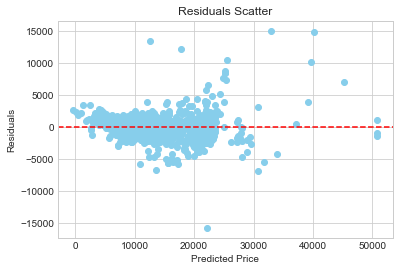

In [ ]:
# residuals scatter plot

plt.figure(figsize=(6,4))
plt.scatter(df_toyota_predicted['predicted_price'], df_toyota_predicted['residuals'], color='skyblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Scatter')

plt.savefig('residuals scatter plot.png', dpi=1200, bbox_inches='tight')

plt.show()


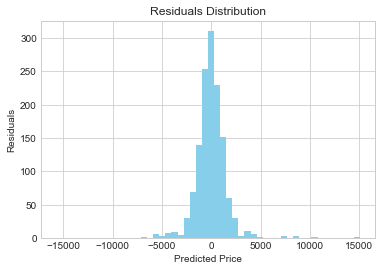

In [ ]:
# residuals distribution plot

df_toyota_predicted['residuals'].hist(figsize=(6,4), bins=50, color='skyblue')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Distribution')

plt.savefig('residuals distribution plot.png', dpi=1200, bbox_inches='tight')

plt.show()


### Residuals satisfy linear regression assumptions:
- random distribution above and below the zero line with no recognizable pattern (linear relation); and
- distribution of points around zero mean (normal distribution).

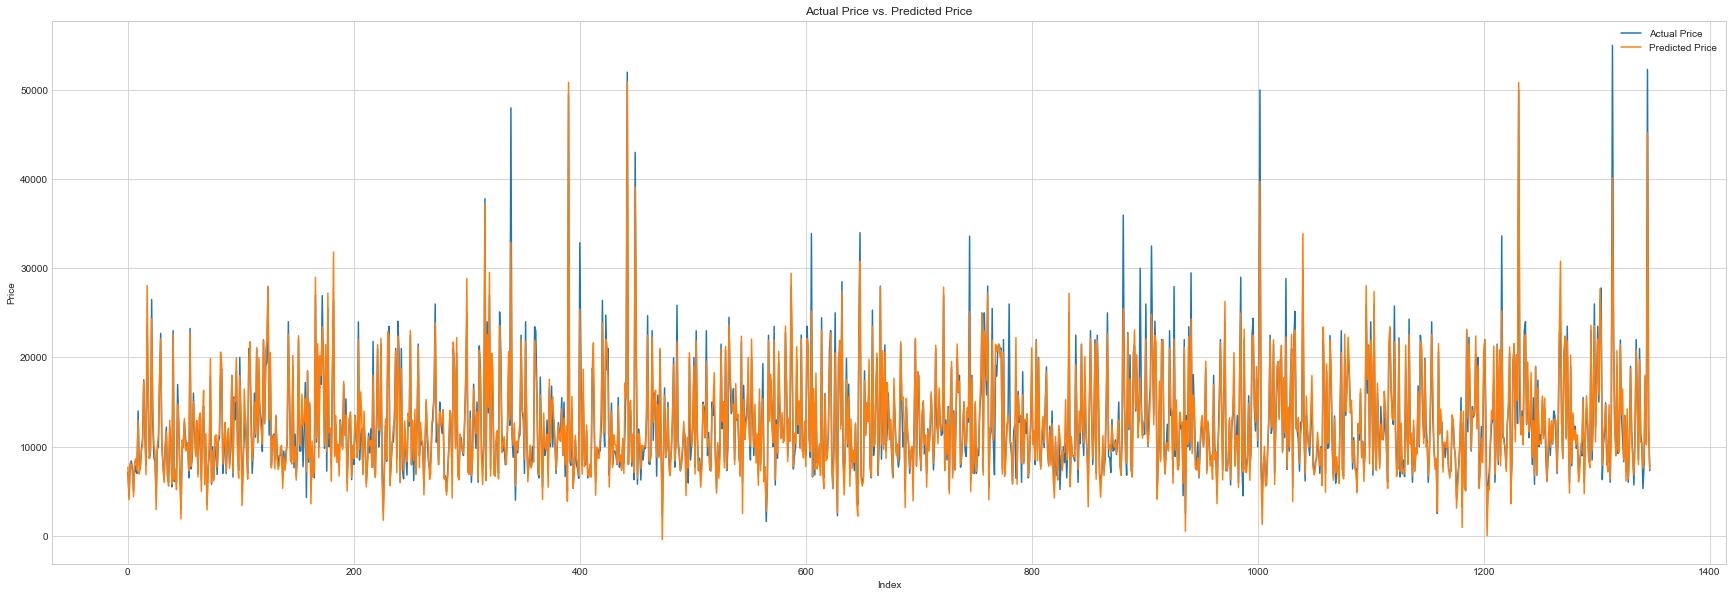

In [ ]:
# "Actual Price" vs "Predicted Price" lines plot
plt.figure(figsize=(30, 10))
plt.plot(df_toyota_predicted['price'], label='Actual Price')
plt.plot(df_toyota_predicted['predicted_price'], label='Predicted Price')

# titles and labels
plt.title("Actual Price vs. Predicted Price")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()


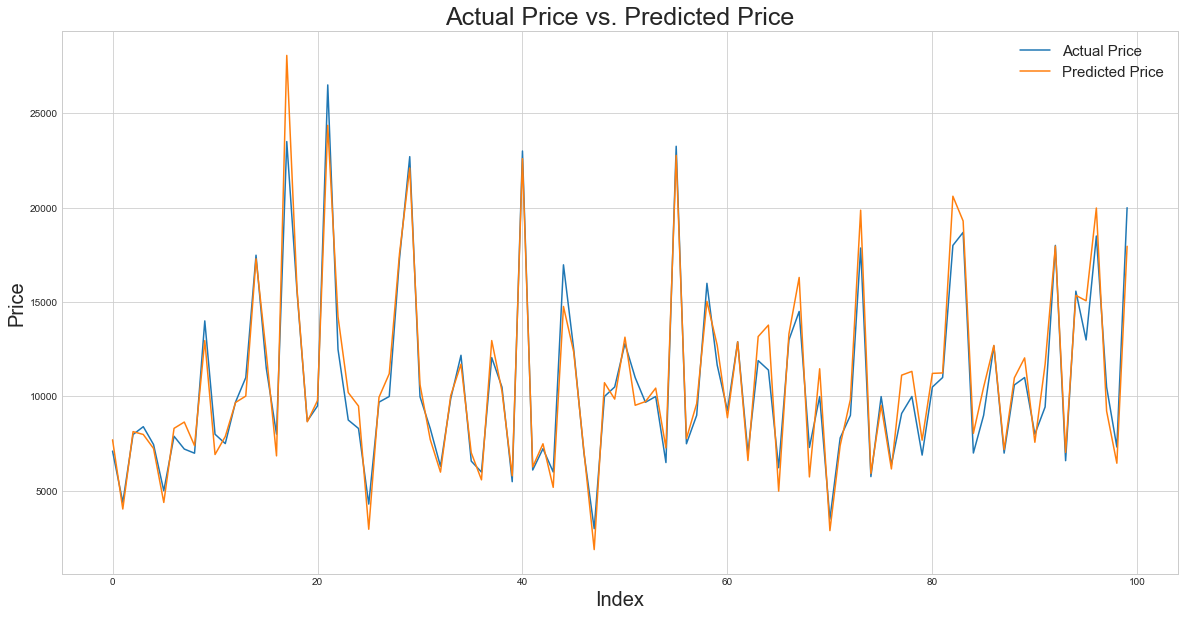

In [ ]:
# "Actual Price" vs "Predicted Price" line plots (for the first 100 entries)

plt.figure(figsize=(20, 10))
plt.plot(df_toyota_predicted[:100]['price'], label='Actual Price')
plt.plot(df_toyota_predicted[:100]['predicted_price'], label='Predicted Price')

# titles and labels
plt.title("Actual Price vs. Predicted Price", fontsize=25)
plt.xlabel("Index", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.legend(fontsize=15)

plt.savefig('actual vs predicted.png', dpi=600, bbox_inches='tight')

plt.show()


### Actual Price vs. Predicted Price:
- **predicted prices** are very close to **actual prices**.
- **residuals** are **low**.

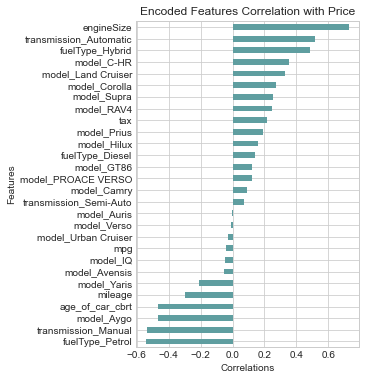

In [ ]:
# Encoded Features Correlation with Price

# calculate correlations
correlations = df_toyota_encoded.corr()['price'].drop('price')

# sort correlations
correlations = correlations.sort_values()

# plot correlations
plt.figure(figsize=(4,6))
correlations.plot(kind='barh', color='cadetblue')
plt.title('Encoded Features Correlation with Price')
plt.xlabel('Correlations')
plt.ylabel('Features')
plt.show()


In [ ]:
# linear model coefficients in DataFrame
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient (standardized)': lin_reg_model_2.coef_})
coefficients_df = coefficients_df.sort_values(by='Coefficient (standardized)').reset_index(drop=True)

# top 5 negative coefficients
coefficients_df.head(5)


,Feature,Coefficient (standardized)
0,age_of_car_cbrt,-1817.980524
1,mileage,-1281.511906
2,model_Aygo,-1240.484786
3,transmission_Manual,-973.749031
4,fuelType_Diesel,-854.463047
